<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Assignment-01" data-toc-modified-id="Assignment-01-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Assignment-01</a></span><ul class="toc-item"><li><span><a href="#1.-第一节课的作业如下：" data-toc-modified-id="1.-第一节课的作业如下：-0.1.1"><span class="toc-item-num">0.1.1&nbsp;&nbsp;</span>1. 第一节课的作业如下：</a></span></li><li><span><a href="#2.-如何提交" data-toc-modified-id="2.-如何提交-0.1.2"><span class="toc-item-num">0.1.2&nbsp;&nbsp;</span>2. 如何提交</a></span></li><li><span><a href="#3.-截止时间" data-toc-modified-id="3.-截止时间-0.1.3"><span class="toc-item-num">0.1.3&nbsp;&nbsp;</span>3. 截止时间</a></span></li></ul></li></ul></li><li><span><a href="#Answer-for-Q1---代码复现" data-toc-modified-id="Answer-for-Q1---代码复现-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Answer for Q1 - 代码复现</a></span><ul class="toc-item"><li><span><a href="#Map-Search" data-toc-modified-id="Map-Search-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Map Search</a></span></li><li><span><a href="#Sentence-Generation" data-toc-modified-id="Sentence-Generation-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Sentence Generation</a></span></li></ul></li><li><span><a href="#基于模式匹配的对话机器人实现" data-toc-modified-id="基于模式匹配的对话机器人实现-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>基于模式匹配的对话机器人实现</a></span><ul class="toc-item"><li><span><a href="#Pattern-Match" data-toc-modified-id="Pattern-Match-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Pattern Match</a></span></li><li><span><a href="#例如" data-toc-modified-id="例如-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>例如</a></span></li><li><span><a href="#获得匹配的变量" data-toc-modified-id="获得匹配的变量-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>获得匹配的变量</a></span></li><li><span><a href="#Segment-Match" data-toc-modified-id="Segment-Match-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Segment Match</a></span></li><li><span><a href="#现在是你的时间了" data-toc-modified-id="现在是你的时间了-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>现在是你的时间了</a></span></li><li><span><a href="#问题1" data-toc-modified-id="问题1-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>问题1</a></span></li><li><span><a href="#问题2" data-toc-modified-id="问题2-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>问题2</a></span></li><li><span><a href="#问题3" data-toc-modified-id="问题3-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>问题3</a></span></li><li><span><a href="#问题4" data-toc-modified-id="问题4-2.9"><span class="toc-item-num">2.9&nbsp;&nbsp;</span>问题4</a></span></li></ul></li></ul></div>

### Assignment-01

#### 1. 第一节课的作业如下：

1. 复现课程的代码， BFS 路线搜索与文本自动生成；
2. 回答以下问题，并将问题发送至deeplearning.nlp.zh@gmail.com中：
```
    2.1. what do you want to acquire in this course？
    2.2. what problems do you want to solve？
    2.3. what’s the advantages you have to finish you goal?
    2.4. what’s the disadvantages you need to onvercome to finish you goal?
    2.5. How will you plan to study in this course period?
```
3. 完成以下练习，进一步体会 Data Driving的编程思想，完成你的第一个较为复杂的对话机器人。

#### 2. 如何提交

1. 代码 + 此 jupyter 相关，提交至自己的 github 中；
2. 第2问，整理发送至deeplearning.nlp.zh@gmail.com邮箱。

#### 3. 截止时间

此次作业截止时间为 2019.4.6日



## Answer for Q1 - 代码复现

### Map Search

In [2]:
BEIJING, CHANGCHUN, MULUMUQI, WUHAN, GUNAGHZOU, SHENZHEN, BANGKOK, SHANGHAI, NEWYORK =  """
BEIJING CHANGCHUN MULUMUQI WUHAN GUANGZHOU SHENZHEN BANGKOK SHANGHAI NEWYORK
""".split()

In [3]:
connection = {
    CHANGCHUN: [BEIJING],
    MULUMUQI: [BEIJING], 
    BEIJING: [MULUMUQI, CHANGCHUN, WUHAN, SHENZHEN, NEWYORK],
    NEWYORK: [BEIJING, SHANGHAI],
    SHANGHAI: [NEWYORK, WUHAN],
    WUHAN: [SHANGHAI, BEIJING, GUNAGHZOU],
    GUNAGHZOU: [WUHAN, BANGKOK],
    SHENZHEN: [WUHAN, BANGKOK],
    BANGKOK: [SHENZHEN, GUNAGHZOU]
}

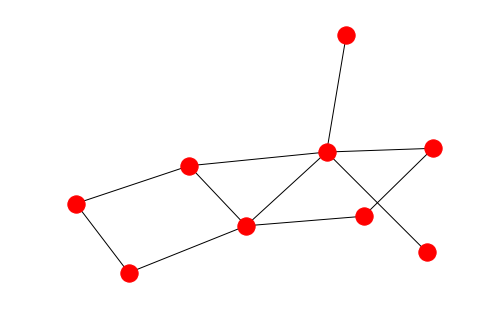

In [7]:
import networkx as nx
%matplotlib inline
graph = connection
g = nx.Graph(graph)
nx.draw(g)

In [8]:
def nagivator(start, destination, connection_graph):
    pathes = [[start] ]
    seen = set()
    
    while pathes:
        path = pathes.pop(0)
        froniter = path[-1]
        
        if froniter in seen: continue
            
        successors = connection_graph[froniter]
        
        for s in successors: 
            if s == destination: 
                path.append(s)
                return path
            else:
                pathes.append(path + [s])  
                
        pathes = sorted(pathes, key=len) # 最小换成
                
        seen.add(froniter)

In [9]:
def nagivator_bfs(start, destination, connection_graph):
    pathes = [start ]
    seen = set()
    
    while pathes:
        froniter = pathes.pop(0)
        
        if froniter in seen: continue
            
        successors = connection_graph[froniter]
        print('standing on {} Looking forward {}'.format(froniter, successors))
        pathes = pathes + successors
                
        seen.add(froniter)

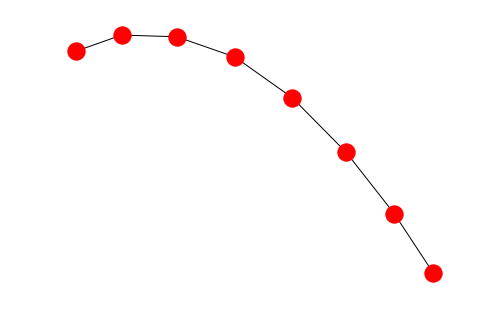

In [11]:
connection_2 = {
    0: [1, 5], 
    1: [0, 2], 
    2: [1, 3], 
    3: [2, 4], 
    4: [3],
    5: [0, 6], 
    6: [5, 7],
    7: [6]
}
nx.draw(nx.Graph(connection_2))

In [12]:
nagivator_bfs(0, 7, connection_2)

standing on 0 Looking forward [1, 5]
standing on 1 Looking forward [0, 2]
standing on 5 Looking forward [0, 6]
standing on 2 Looking forward [1, 3]
standing on 6 Looking forward [5, 7]
standing on 3 Looking forward [2, 4]
standing on 7 Looking forward [6]
standing on 4 Looking forward [3]


In [13]:
def nagivator_dfs(start, destination, connection_graph):
    pathes = [start ]
    seen = set()
    
    while pathes:
        froniter = pathes.pop(0)
        
        if froniter in seen: continue
            
        successors = connection_graph[froniter]
        print('standing on {} Looking forward {}'.format(froniter, successors))
        pathes = successors + pathes
                
        seen.add(froniter)

In [14]:
nagivator_dfs(0, 7, connection_2)

standing on 0 Looking forward [1, 5]
standing on 1 Looking forward [0, 2]
standing on 2 Looking forward [1, 3]
standing on 3 Looking forward [2, 4]
standing on 4 Looking forward [3]
standing on 5 Looking forward [0, 6]
standing on 6 Looking forward [5, 7]
standing on 7 Looking forward [6]


In [15]:
def draw_route(routes):
    print('🛫->'.join(routes))
draw_route(nagivator(CHANGCHUN, BANGKOK, connection))

CHANGCHUN🛫->BEIJING🛫->SHENZHEN🛫->BANGKOK


### Sentence Generation

In [18]:
grammar = """
sentence => noun_phrase verb_phrase 
noun_phrase => Article Adj* noun
Adj* => null | Adj Adj*
verb_phrase => verb noun_phrase
Article =>  一个 | 这个
noun =>   女人 |  篮球 | 桌子 | 小猫
verb => 看着   |  坐在 |  听着 | 看见
Adj =>   蓝色的 |  好看的 | 小小的
"""

In [22]:
#定义语法创建函数：从语法内容中读取语法规则并映射到创建的字典，键值为声明，值为表达式
def build_grammar(grammar_str, split='='):
    grammar_pattern = {}
    for line in grammar_str.split('\n'):
        if not line: continue
        stmt, expr = line.split(split)
        grammar_pattern[stmt.strip()] = [e.split() for e in expr.split('|')]
    return grammar_pattern

In [30]:
build_grammar(grammar)

{'Adj': [['>', '蓝色的'], ['好看的'], ['小小的']],
 'Adj*': [['>', 'null'], ['Adj', 'Adj*']],
 'Article': [['>', '一个'], ['这个']],
 'noun': [['>', '女人'], ['篮球'], ['桌子'], ['小猫']],
 'noun_phrase': [['>', 'Article', 'Adj*', 'noun']],
 'sentence': [['>', 'noun_phrase', 'verb_phrase']],
 'verb': [['>', '看着'], ['坐在'], ['听着'], ['看见']],
 'verb_phrase': [['>', 'verb', 'noun_phrase']]}

In [26]:
#定义生成符合某声明的函数：
import random
def generate(grammar_pattern, target):
    if target not in grammar_pattern: return target
    
    expr = random.choice(grammar_pattern[target])
    
    tokens = [generate(grammar_pattern, e) for e in expr]#递归调用自己，直到表达式中不含有已声明内容
    
    return ''.join([t for t in tokens if t != 'null'])

In [27]:
grammar_pattern = build_grammar(grammar)
generate(grammar_pattern, 'sentence')

'>>这个好看的>>女人>听着>这个>小猫'

In [37]:
def parse_grammar(grammar_str, sep='=>'):
    grammar = {}
    for line in grammar_str.split('\n'): 
        line = line.strip()
        if not line: continue
        
        target, rules = line.split(sep)
        
        grammar[target.strip()] = [r.split() for r in rules.split('|')]
    
    return grammar

In [38]:
g = parse_grammar(grammar)

In [39]:
g

{'Adj': [['蓝色的'], ['好看的'], ['小小的']],
 'Adj*': [['null'], ['Adj', 'Adj*']],
 'Article': [['一个'], ['这个']],
 'noun': [['女人'], ['篮球'], ['桌子'], ['小猫']],
 'noun_phrase': [['Article', 'Adj*', 'noun']],
 'sentence': [['noun_phrase', 'verb_phrase']],
 'verb': [['看着'], ['坐在'], ['听着'], ['看见']],
 'verb_phrase': [['verb', 'noun_phrase']]}

In [40]:
def gene(grammar_parsed, target='sentence'):
    if target not in grammar_parsed: return target
    
    rule = random.choice(grammar_parsed[target])
    return ''.join(gene(grammar_parsed, target=r) for r in rule if r!='null')

In [41]:
g['sentence']

[['noun_phrase', 'verb_phrase']]

In [42]:
gene(g)

'这个女人看着一个女人'

In [43]:
for i in range(20):
    print(gene(parse_grammar(decimal_grammar, sep='='), target='expression'))

2*4*7-1
9+4+6*4
21+1+8-2
8/7*6-0
8*0*6*27
4/8*6-8
9*6/6*2
2*3-1+3
5/3+4-3
1-94/9+5
97+9*93/2
9-8-1*62
1*0+1*5
4-2/5+34
0+7*6-2
4*8+7*7
7/5+6-1
5*8/8+9
5-7/7*6
1+8+0*0


## 基于模式匹配的对话机器人实现

### Pattern Match

机器能否实现对话，这个长久以来是衡量机器人是否具有智能的一个重要标志。 Alan Turing早在其文中就提出过一个测试机器智能程度的方法，该方法主要是考察人类是否能够通过对话内容区分对方是机器人还是真正的人类，如果人类无法区分，我们就称之为具有”智能“。而这个测试，后来被大家叫做”图灵测试“，之后也被翻拍成了一步著名电影，叫做《模拟游戏》。 



既然图灵当年以此作为机器是否具备智能的标志，这项任务肯定是复杂的。自从 1960s 开始，诸多科学家就希望从各个方面来解决这个问题，直到如今，都只能解决一部分问题。 目前对话机器人的建立方法有很多，今天的作业中，我们为大家提供一共快速的基于模板的对话机器人配置方式。

此次作业首先希望大家能够读懂这段程序的代码，其次，在此基于我们提供的代码，**能够把它改造成汉语版本，实现对话效果。**

```
Pattern: (我想要A)
Response: (如果你有 A，对你意味着什么呢？)

Input: (我想要度假)
Response: (如果你有度假，对你意味着什么呢？)
```

为了实现模板的判断和定义，我们需要定义一个特殊的符号类型，这个符号类型就叫做"variable"， 这个"variable"用来表示是一个占位符。例如，定义一个目标: "I want X"， 我们可以表示成  "I want ?X", 意思就是?X是一个用来占位的符号。

如果输入了"I want holiday"， 在这里 'holiday' 就是 '?X'

In [76]:
def is_variable(pat):
    return pat.startswith('?') and all(s.isalpha() for s in pat[1:])

def pat_match(pattern, saying):
    if is_variable(pattern[0]): return True
    else:
        if pattern[0] != saying[0]: return False
        else:
            return pat_match(pattern[1:], saying[1:])

def is_variable_zh(pat):
    return pat.startswith('what') and all(s.isalpha() for s in pat[1:]) and len(pat)==5

def pat_match_zh(pattern, saying):
    if is_variable_zh(pattern[0]): return True
    else:
        if pattern[0] != saying[0]: return False
        else:
            return pat_match_zh(pattern[1:], saying[1:])

In [77]:
is_variable_zh("whata")

True

### 例如

In [78]:
pat_match('I want ?X'.split(), "I want holiday".split())

True

In [79]:
pat_match('I have dreamed a ?X'.split(), "I dreamed about dog".split())

False

In [80]:
pat_match('I dreamed about ?X'.split(), "I dreamed about dog".split())

True

In [81]:
import jieba
def cut(string): return list(jieba.cut(string))
pattern1="好好学习，whata天天向上"
saying1="好好学习，小明天天向上"
pat_match_zh(cut(pattern1),cut(saying1))

True

### 获得匹配的变量

以上的函数能够判断两个 pattern 是不是相符，但是我们更加希望的是获得每个variable对应的是什么值。

我们对程序做如下修改:

In [82]:
def pat_match(pattern, saying):
    if is_variable(pattern[0]):
        return pattern[0], saying[0]
    else:
        if pattern[0] != saying[0]: return False
        else:
            return pat_match(pattern[1:], saying[1:])

In [83]:
pattern = 'I want ?X'.split()
saying = "I want holiday".split()

In [84]:
pat_match(pattern, saying)

('?X', 'holiday')

In [85]:
pat_match("?X equals ?X".split(), "2+2 equals 2+2".split())

('?X', '2+2')

In [86]:
def pat_match_zh(pattern, saying):
    if is_variable_zh(pattern[0]):
        return pattern[0], saying[0]
    else:
        if pattern[0] != saying[0]: return False
        else:
            return pat_match_zh(pattern[1:], saying[1:])

In [87]:
pat_match_zh(cut(pattern1),cut(saying1))

('whata', '小明')

但是，如果我们的 Pattern 中具备两个变量，那么以上程序就不能解决了，我们可以对程序做如下修改: 


In [88]:
def pat_match(pattern, saying):
    if not pattern or not saying: return []
    
    if is_variable(pattern[0]):
        return [(pattern[0], saying[0])] + pat_match(pattern[1:], saying[1:])
    else:
        if pattern[0] != saying[0]: return []
        else:
            return pat_match(pattern[1:], saying[1:])

In [89]:
def pat_match_zh(pattern, saying):
    if not pattern or not saying: return []
    
    if is_variable_zh(pattern[0]):
        return [(pattern[0], saying[0])] + pat_match_zh(pattern[1:], saying[1:])
    else:
        if pattern[0] != saying[0]: return []
        else:
            return pat_match_zh(pattern[1:], saying[1:])

于是，我们可以获得： 

In [90]:
pat_match("?X greater than ?Y".split(), "3 greater than 2".split())

[('?X', '3'), ('?Y', '2')]

In [91]:
pattern1="whata好好学习，whatb天天向上"
saying1="小明好好学习，小华天天向上"

In [92]:
cut(pattern1)

['whata', '好好学习', '，', 'whatb', '天天向上']

In [93]:
cut(saying1)

['小明', '好好学习', '，', '小华', '天天向上']

In [94]:
is_variable_zh(cut(pattern1)[3])

True

In [95]:
pattern1="whata好好学习，whatb天天向上"
saying1="小明好好学习，小华天天向上"
pat_match_zh(cut(pattern1),cut(saying1))

[('whata', '小明'), ('whatb', '小华')]

如果我们知道了每个变量对应的是什么，那么我们就可以很方便的使用我们定义好的模板进行替换：

为了方便接下来的替换工作，我们新建立两个函数，一个是把我们解析出来的结果变成一个 dictionary，一个是依据这个 dictionary 依照我们的定义的方式进行替换。

In [52]:
def pat_to_dict(patterns):
    return {k: v for k, v in patterns}

In [53]:
def subsitite(rule, parsed_rules):
    if not rule: return []
    
    return [parsed_rules.get(rule[0], rule[0])] + subsitite(rule[1:], parsed_rules)

In [54]:
got_patterns = pat_match("I want ?X".split(), "I want iPhone".split())

In [99]:
got_patterns

[('?X', 'iPhone')]

In [100]:
subsitite("What if you mean if you got a ?X".split(), pat_to_dict(got_patterns))

['What', 'if', 'you', 'mean', 'if', 'you', 'got', 'a', 'iPhone']

In [101]:
got_patterns = pat_match_zh(cut("好好学习，whata天天向上"),cut("好好学习，小明天天向上") )
subsitite(cut("好好学习，whata天天向上"), pat_to_dict(got_patterns))

['好好学习', '，', '小明', '天天向上']

In [102]:
"".join(subsitite(cut("好好学习，whata天天向上"), pat_to_dict(got_patterns)))

'好好学习，小明天天向上'

为了将以上输出变成一句话，也很简单，我们使用 Python 的 join 方法即可： 

In [103]:
john_pat = pat_match('?P needs ?X'.split(), "John needs vacation".split())

In [104]:
subsitite("Why does ?P need ?X ?".split(), pat_to_dict(john_pat))

['Why', 'does', 'John', 'need', 'vacation', '?']

In [105]:
' '.join(subsitite("Why does ?P need ?X ?".split(), pat_to_dict(john_pat)))

'Why does John need vacation ?'

In [106]:
john_pat_1 = pat_match_zh(cut("whata好好学习吗？whatb天天向上吗？"), cut("阿珍好好学习吗？阿强天天向上吗？"))

"".join(subsitite(cut("whata爱上了whatb，在一个有星星的夜晚"), pat_to_dict(john_pat_1)))

'阿珍爱上了阿强，在一个有星星的夜晚'

那么如果我们现在定义一些patterns，就可以实现基于模板的对话生成了:

In [107]:
defined_patterns = {
    "I need ?X": ["Image you will get ?X soon", "Why do you need ?X ?"], 
    "My ?X told me something": ["Talk about more about your ?X", "How do you think about your ?X ?"]
}

In [108]:
import numpy as np
def get_response(saying, defined_patterns):
    """" please implement the code, to get the response as followings:
    
    >>> get_response('I need iPhone') 
    >>> Image you will get iPhone soon
    >>> get_response("My mother told me something")
    >>> Talk about more about your monther.
    """
    not_find_saying=True
    for i in defined_patterns:
        
        if not pat_match(i.split(), saying.split())==[]:
            not_find_saying=False
            got_patterns = pat_match(i.split(), saying.split())
            choose_response = np.random.randint(2)
            response_patterns = defined_patterns[i][choose_response]
            response=' '.join(subsitite(response_patterns.split(), pat_to_dict(got_patterns)))
            return(response)
    if not_find_saying: print("What are you talking about")
    

saying1 = "I need banana"
saying2 = "My mother brought me soup"
saying3 = "Haha, bug comes"
get_response(saying2, defined_patterns)

'How do you think about your mother ?'

In [34]:
import numpy as np
import jieba
def get_response_zh(saying, defined_patterns):
    """" please implement the code, to get the response as followings:
    
    >>> get_response('机器人，问你个问题？') 
    >>> 说吧，什么问题？（顺便提一句，不要叫我机器人，我有自己的名字，吼！）
    >>> get_response("你知道你妈妈的爸爸是谁吗？")
    >>> 我爸爸关你毛事？走人
    """
    not_find_saying=True
    for i in defined_patterns:
        
        if not pat_match_zh(cut(i), cut(saying))==[]:
            not_find_saying=False
            got_patterns = pat_match_zh(cut(i), cut(saying))
            choose_response = np.random.randint(2)
            response_patterns = defined_patterns[i][choose_response]
            response=''.join(subsitite(cut(response_patterns), pat_to_dict(got_patterns)))
            return(response)
    if not_find_saying: print("What are you talking about")

In [35]:
defined_patterns = {
    "嗨，whatb，问你个whata？": ["说吧，什么whata？，我下线了（顺便提一句，不要叫我whatb，我有自己的名字，吼！）","我是whatb，问我whata当然可以呀"], 
    "你知道你whata是谁吗？": ["我whata关你毛事？走人","我知道whata是谁"]
}

saying1="嗨，机器人，问你个问题？"
saying2="你知道你爸爸是谁吗？"
saying3 = "Haha, bug comes"

In [36]:
get_response_zh(saying1, defined_patterns)

'我是机器人，问我问题当然可以呀'

### Segment Match

我们上边的这种形式，能够进行一些初级的对话了，但是我们的模式逐字逐句匹配的， "I need iPhone" 和 "I need ?X" 可以匹配，但是"I need an iPhone" 和 "I need ?X" 就不匹配了，那怎么办？ 

为了解决这个问题，我们可以新建一个变量类型 "?\*X", 这种类型多了一个星号(\*),表示匹配多个

首先，和前文类似，我们需要定义一个判断是不是匹配多个的variable

In [14]:
def is_pattern_segment(pattern):
    return pattern.startswith('?*') and all(a.isalpha() for a in pattern[2:])

In [15]:
is_pattern_segment('?*P')

True

In [16]:
def is_pattern_segment_zh(pattern):
    return pattern.startswith('whatis') and all(a.isalpha() for a in pattern[4:])

In [17]:
is_pattern_segment_zh('whatisa')

True

In [18]:
from collections import defaultdict

然后我们把之前的 ```pat_match```程序改写成如下， 主要是增加了 ``` is_pattern_segment ```的部分. 

这段程序里比较重要的一个新函数是 ```segment_match```，这个函数输入是一个以 ```segment_pattern```开头的模式，尽最大可能进行，匹配到这个*边长*的变量对于的部分。

In [39]:
import jieba
def cut(string): return list(jieba.cut(string))
def is_variable(pat):
    return pat.startswith('?') and all(s.isalpha() for s in pat[1:])

def pat_match(pattern, saying):
    if is_variable(pattern[0]): return True
    else:
        if pattern[0] != saying[0]: return False
        else:
            return pat_match(pattern[1:], saying[1:])

def is_variable_zh(pat):
    return pat.startswith('what') and all(s.isalpha() for s in pat[1:]) and len(pat)==5

def pat_match_zh(pattern, saying):
    if is_variable_zh(pattern[0]): return True
    else:
        if pattern[0] != saying[0]: return False
        else:
            return pat_match_zh(pattern[1:], saying[1:])
def pat_to_dict(patterns):
    return {k: v for k, v in patterns}        
def subsitite(rule, parsed_rules):
    if not rule: return []
    
    return [parsed_rules.get(rule[0], rule[0])] + subsitite(rule[1:], parsed_rules)

In [20]:
is_variable_zh("whata")

True

In [21]:
is_variable_zh("whatisa")

False

In [22]:
def segment_match(pattern, saying):
    seg_pat, rest = pattern[0], pattern[1:]
    seg_pat = seg_pat.replace('?*', '?')

    if not rest: return (seg_pat, saying), len(saying)    
    
    for i, token in enumerate(saying):
        if rest[0] == token:  
            return (seg_pat, saying[:i]), i
    
    return (seg_pat, saying), len(saying)
        

segment_match('?*P is very good'.split(), " My dog and my cat is very good".split())

(('?P', ['My', 'dog', 'and', 'my', 'cat']), 5)

In [23]:
cut("whatisb")

['whatisb']

In [24]:
def segment_match_zh(pattern, saying):
    seg_pat, rest = pattern[0], pattern[1:]
    seg_pat = seg_pat.replace('whatis', 'what')

    if not rest: return (seg_pat, saying), len(saying)    
    
    for i, token in enumerate(saying):
        if rest[0] == token:  
            return (seg_pat, saying[:i]), i
    
    return (seg_pat, saying), len(saying)
        

segment_match_zh(cut('whatisa转世续缘'),cut("东方月初转世续缘"))

(('whata', ['东方', '月初']), 2)

In [25]:
fail = [True, None]

def pat_match_with_seg(pattern, saying):
    if not pattern or not saying: return []
    
    pat = pattern[0]
    
    if is_variable(pat):
        return [(pat, saying[0])] + pat_match_with_seg(pattern[1:], saying[1:])
    elif is_pattern_segment(pat):
        match, index = segment_match(pattern, saying)
        return [match] + pat_match_with_seg(pattern[1:], saying[index:])
    elif pat == saying[0]:
        return pat_match_with_seg(pattern[1:], saying[1:])
    else:
        return fail

In [26]:
pat_match_with_seg('?*P is very good and ?*X'.split(), "My dog is very good and my cat is very cute".split())

[('?P', ['My', 'dog']), ('?X', ['my', 'cat', 'is', 'very', 'cute'])]

In [27]:
fail = [True, None]

def pat_match_with_seg_zh(pattern, saying):
    if not pattern or not saying: return []
    
    pat = pattern[0]
    
    if is_variable_zh(pat):
        return [(pat, saying[0])] + pat_match_with_seg_zh(pattern[1:], saying[1:])
    elif is_pattern_segment_zh(pat):
        match, index = segment_match_zh(pattern, saying)
        return [match] + pat_match_with_seg_zh(pattern[1:], saying[index:])
    elif pat == saying[0]:
        return pat_match_with_seg_zh(pattern[1:], saying[1:])
    else:
        return fail

In [28]:
cut('whatisa真呆毛whatisb真俗气')

['whatisa', '真呆毛', 'whatisb', '真', '俗气']

In [29]:
cut("东方月初真呆毛王权富贵真俗气")

['东方', '月初', '真呆毛', '王权', '富贵', '真', '俗气']

In [30]:
pat_match_with_seg_zh(cut('whatisa真呆毛whatisb真俗气'), cut("东方月初真呆毛王权富贵真俗气"))

[('whata', ['东方', '月初']), ('whatb', ['王权', '富贵'])]

In [31]:
saying1 = "I am mike, hello "
saying2 = "I was a hero"
saying3 = "Haha, bug comes"

In [32]:
i="I was whatisa"

In [33]:
isinstance(pat_match_with_seg_zh(cut(i),cut(saying1))[0],bool)

True

In [34]:
import numpy as np
def get_response(saying, defined_patterns):
    """" please implement the code, to get the response as followings:
    
    >>> get_response("I am mike, hello ") 
    >>> Hi, how do you do? / Hello, nice to meet you
    >>> get_response("I was a hero")
    >>> Were you already a hero ? / I already knew you were a hero .
    """
    not_find_saying=True
    
    for i in defined_patterns:
        match_result = pat_match_with_seg_zh(cut(i),cut(saying))
        if not isinstance(match_result[0],bool):
            not_find_saying=False
            #got_patterns = pat_match_with_seg(i.split(), saying.split())
            choose_response = np.random.randint(2)
            response_patterns = defined_patterns[i][choose_response]
            response=''.join(subsitite(cut(response_patterns), pat_to_dict_zh(match_result)))
            return(response)
    if not_find_saying: print("What are you talking about")

现在，我们就可以做到以下的匹配模式了: 

如果我们继续定义一些模板，我们进行匹配，就能够进行更加复杂的问题了: 

In [35]:
response_pair = {
    'I need ?X': [
        "Why do you neeed ?X"
    ],
    "I dont like my ?X": ["What bad things did ?X do for you?"]
}

In [36]:
pat_match_with_seg('I need ?*X'.split(), 
                  "I need an iPhone".split())

[('?X', ['an', 'iPhone'])]

In [40]:
subsitite("Why do you neeed ?X".split(), pat_to_dict(pat_match_with_seg('I need ?*X'.split(), 
                  "I need an iPhone".split())))

['Why', 'do', 'you', 'neeed', ['an', 'iPhone']]

In [41]:
pat_match_with_seg_zh(cut('我需要whatisa'), 
                  cut("我需要一个苹果手机"))

[('whata', ['一个', '苹果', '手机'])]

In [42]:
subsitite(cut("为什么你需要whata"), pat_to_dict(pat_match_with_seg_zh(cut('我需要whatisa'), 
                  cut("我需要一个苹果手机"))))

['为什么', '你', '需要', ['一个', '苹果', '手机']]

 我们会发现，pat_to_dict在这个场景下会有有一点小问题，没关系，修正一些: 

In [43]:
def pat_to_dict(patterns):
    return {k: ' '.join(v) if isinstance(v, list) else v for k, v in patterns}

In [44]:
subsitite("Why do you neeed ?X".split(), pat_to_dict(pat_match_with_seg('I need ?*X'.split(), 
                  "I need an iPhone".split())))

['Why', 'do', 'you', 'neeed', 'an iPhone']

In [45]:
def pat_to_dict_zh(patterns):
    return {k: ''.join(v) if isinstance(v, list) else v for k, v in patterns}

In [46]:
subsitite(cut("为什么你需要whata"), pat_to_dict_zh(pat_match_with_seg_zh(cut('我需要whatisa'), 
                  cut("我需要一个苹果手机"))))

['为什么', '你', '需要', '一个苹果手机']

如果我们定义这样的一个模板:

In [62]:
("?*X hello ?*Y", "Hi, how do you do")

('?*X hello ?*Y', 'Hi, how do you do')

In [74]:
subsitite("Hi, how do you do?".split(), pat_to_dict(pat_match_with_seg('?*X hello ?*Y'.split(), 
                  "I am mike, hello ".split())))

['Hi,', 'how', 'do', 'you', 'do?']

In [79]:
match_result = pat_match_with_seg('I was ?*Y'.split(), 
                  "I am mike, hello ".split())

In [81]:
match_result

[True, None]

In [82]:
 pat_match_with_seg('I was ?*Y'.split(), 
                  "I was mike, hello ".split())

[('?Y', ['mike,', 'hello'])]

In [67]:
subsitite(cut("你好，nice to meet you"), pat_to_dict_zh(pat_match_with_seg_zh(cut('whatisa你好whatisb'), 
                  cut("我叫麦克，你好啊小伙子"))))

['你好', '，', 'nice', ' ', 'to', ' ', 'meet', ' ', 'you']

### 现在是你的时间了

In [150]:
import numpy as np
#Chinese question
def get_response_zh(saying, defined_patterns):
    """" please implement the code, to get the response as followings:
    
    >>> get_response("我叫麦克，你好啊小伙子") 
    >>> 你好，nice to meet you / 你好啊
    >>> get_response("我需要一个苹果手机")
    >>> 为什么你需要一个苹果手机 ? / 你可以点击这个网站购买一个苹果手机
    """
    #not_find_saying=True
    match_length=0#matched length/total length of saying
    for i in defined_patterns:
        match_result=pat_match_with_seg_zh(cut(i), 
                  cut(saying))
        match_result_length = len(match_result)
        #print("i="+str(i))
        #print("match_result="+str(match_result))
        #print(len(match_result))
        if (not match_result[match_result_length-1] == True and not match_result[match_result_length-1] == None):
            #not_find_saying = False
            #print(match_result)
            _, match_list = match_result[0]
            match_words_length=0
            for _,match_words in match_result:
                match_words_length+=len(match_words)
            match_length_new = 1-match_words_length/len(cut(saying))
            if match_length_new >= match_length:
                choose_response = np.random.randint(len(defined_patterns[i]))
                response_patterns = defined_patterns[i][choose_response]
                response_list=subsitite(cut(response_patterns), pat_to_dict_zh(match_result))
                match_length = match_length_new

    if match_length==0: print("抱歉，我听不懂你在说什么")
    else: return ''.join(response_list)

In [151]:
defined_patterns = {
    "whatisa你好whatisb": ["你好，nice to meet you", "你好啊"],
    "我需要whatisa": ["为什么你需要whata？", "你可以点击这个网站购买whata"]
}

In [152]:
saying1 = "我叫麦克，你好啊小伙子"
saying2 = "我需要一个苹果手机"
saying3 = "Haha, bug comes"
get_response_zh(saying2, rule_responses)#defined_patterns)

'其实很有可能我们互相需要一个苹果手机'

In [156]:
import numpy as np
#English question
def get_response(saying, defined_patterns):
    """" please implement the code, to get the response as followings:
    
    >>> get_response("I am mike, hello ") 
    >>> Hi, how do you do? / Hello, nice to meet you
    >>> get_response("I was a hero")
    >>> Were you already a hero ? / I already knew you were a hero .
    """
    #not_find_saying=True
    match_length=0#matched length/total length of saying
    for i in defined_patterns:
        match_result=pat_match_with_seg(i.split(), 
                  saying.split())
        match_result_length = len(match_result)
        # _, match_list=match_result[0]
        if (not match_result[match_result_length-1] == True and not match_result[match_result_length-1] == None):
            #not_find_saying = False
            _, match_list = match_result[0]
            match_words_length = 0
            for _, match_words in match_result:
                match_words_length+=len(match_words)
            match_length_new = 1-match_words_length/len(saying.split())
            if match_length_new >= match_length:
                choose_response = np.random.randint(len(defined_patterns[i]))
                response_patterns = defined_patterns[i][choose_response]
                response_list = subsitite(response_patterns.split(), pat_to_dict(match_result))
                match_length = match_length_new

    if match_length == 0: print("What are you talking about")
    else: return ' '.join(response_list)
    

In [157]:
#我们给大家一些例子: 
    
defined_patterns = {
    "?*X hello ?*Y": ["Hi, how do you do?", "Hello, nice to meet you"],
    "I was ?*X": ["Were you really ?X ?", "I already knew you were ?X ."]
}

In [158]:
saying1 = "I am mike, hello "
saying2 = "I was a hero"
saying3 = "Haha, bug comes"
get_response(saying2, defined_patterns)

'Were you really a hero ?'

In [159]:
# combine English and Chinese model:
def get_response_combined(saying, defined_patterns):
    Chinese_in_saying = False
    for i in saying:
        if '\u4e00' <= i <= '\u9fa5':
            Chinese_in_saying = True
            continue
    if Chinese_in_saying:
        #saying = cut(saying)
        return get_response_zh(saying, defined_patterns)
    else:
        #saying = saying.split()
        return get_response(saying, defined_patterns)

In [160]:
saying1 = "I am mike, hello "
saying2 = "I was a hero"
saying3 = "Haha, bug comes"
saying4 = "我叫麦克，你好啊小伙子"
saying5 = "我需要一个苹果手机"
saying6 = "Haha, bug comes"

In [161]:
rule_responses = {
    '?*X hello ?*Y': ['How do you do', 'Please state your problem'],
    '?*X I want ?*Y': ['what would it mean if you got ?Y', 'Why do you want ?Y', 'Suppose you got ?Y soon'],
    '?*X if ?*Y': ['Do you really think its likely that ?Y', 'Do you wish that ?Y', 'What do you think about ?Y', 'Really-- if ?Y'],
    '?*X no ?*Y': ['why not?', 'You are being a negative', 'Are you saying \'No\' just to be negative?'],
    '?*X I was ?*Y': ['Were you really', 'Perhaps I already knew you were ?Y', 'Why do you tell me you were ?Y now?'],
    '?*X I feel ?*Y': ['Do you often feel ?Y ?', 'What other feelings do you have?'],
    'whatisa你好whatisb': ['你好呀', '请告诉我你的问题'],
    'whatisa我想whatisb': ['你觉得whatb有什么意义呢？', '为什么你想whatb', '你可以想想你很快就可以whatb了'],
    'whatisa我想要whatisb': ['whata想问你，你觉得whatb有什么意义呢?', '为什么你想whatb', 'whata觉得... 你可以想想你很快就可以有whatb了', '你看whata像whatb不', '我看你就像whatb'],
    'whatisa喜欢whatisb': ['喜欢whatb的哪里？', 'whatb有什么好的呢？', '你想要whatb吗？'],
    'whatisa讨厌whatisb': ['whatb怎么会那么讨厌呢?', '讨厌whatb的哪里？', 'whatb有什么不好呢？', '你不想要whatb吗？'],
    'whatisaAIwhatisb': ['你为什么要提AI的事情？', '你为什么觉得AI要解决你的问题？'],
    'whatisa机器人whatisb': ['你为什么要提机器人的事情？', '你为什么觉得机器人要解决你的问题？'],
    'whatisa对不起whatisb': ['不用道歉', '你为什么觉得你需要道歉呢?'],
    'whatisa我记得whatisb': ['你经常会想起这个吗？', '除了whatb你还会想起什么吗？', '你为什么和我提起whatb'],
    'whatisa如果whatisb': ['你真的觉得whatb会发生吗？', '你希望whatb吗?', '真的吗？如果whatb的话', '关于whatb你怎么想？'],
    'whatisa我?*z梦见whatisb':['真的吗? --- whatb', '你在醒着的时候，以前想象过whatb吗？', '你以前梦见过whatb吗'],
    'whatisa妈妈whatisb': ['你家里除了whatb还有谁?', '嗯嗯，多说一点和你家里有关系的', '她对你影响很大吗？'],
    'whatisa爸爸whatisb': ['你家里除了whatb还有谁?', '嗯嗯，多说一点和你家里有关系的', '他对你影响很大吗？', '每当你想起你爸爸的时候， 你还会想起其他的吗?'],
    'whatisa我愿意whatisb': ['我可以帮你whatb吗？', '你可以解释一下，为什么想whatb'],
    'whatisa我很难过，因为whatisb': ['我听到你这么说， 也很难过', 'whatb不应该让你这么难过的'],
    'whatisa难过whatisb': ['我听到你这么说， 也很难过',
                 '不应该让你这么难过的，你觉得你拥有什么，就会不难过?',
                 '你觉得事情变成什么样，你就不难过了?'],
    'whatisa就像whatisb': ['你觉得whata和whatb有什么相似性？', 'whata和whatb真的有关系吗？', '怎么说？'],
    'whatisa和whatisb都?*z': ['你觉得?z有什么问题吗?', '?z会对你有什么影响呢?'],
    'whatisa和whatisb一样?*z': ['你觉得?z有什么问题吗?', '?z会对你有什么影响呢?'],
    'whatisa我是whatisb': ['真的吗？', 'whata想告诉你，或许我早就知道你是whatb', '你为什么现在才告诉我你是whatb'],
    'whatisa我是whatisb吗': ['如果你是whatb会怎么样呢？', '你觉得你是whatb吗', '如果你是whatb，那一位着什么?'],
    'whatisa你是whatisb吗':  ['你为什么会对我是不是whatb感兴趣?', '那你希望我是whatb吗', '你要是喜欢， 我就会是whatb'],
    'whatisa你是whatisb' : ['为什么你觉得我是whatb'],
    'whatisa因为whatisb' : ['whatb是真正的原因吗？', '你觉得会有其他原因吗?'],
    'whatisa我不能whatisb': ['你或许现在就能whatisb', '如果你能whatisb,会怎样呢？'],
    'whatisa我觉得whatisb': ['你经常这样感觉吗？', '除了到这个，你还有什么其他的感觉吗？'],
    'whatisa我whatisb你?*z': ['其实很有可能我们互相whatb'],
    'whatisa你为什么不whatisb': ['你自己为什么不whatb', '你觉得我不会whatb', '等我心情好了，我就whatb'],
    'whatisa好的whatisb': ['好的', '你是一个很正能量的人'],
    'whatisa嗯嗯whatisb': ['好的', '你是一个很正能量的人'],
    'whatisa不嘛whatisb': ['为什么不？', '你有一点负能量', '你说 不，是想表达不想的意思吗？'],
    'whatisa不要whatisb': ['为什么不？', '你有一点负能量', '你说 不，是想表达不想的意思吗？'],
    'whatisa有些人whatisb': ['具体是哪些人呢?'],
    'whatisa有的人whatisb': ['具体是哪些人呢?'],
    'whatisa某些人whatisb': ['具体是哪些人呢?'],
    'whatisa每个人whatisb': ['我确定不是人人都是', '你能想到一点特殊情况吗？', '例如谁？', '你看到的其实只是一小部分人'],
    'whatisa所有人whatisb': ['我确定不是人人都是', '你能想到一点特殊情况吗？', '例如谁？', '你看到的其实只是一小部分人'],
    'whatisa总是whatisb': ['你能想到一些其他情况吗?', '例如什么时候?', '你具体是说哪一次？', '真的---总是吗？'],
    'whatisa一直whatisb': ['你能想到一些其他情况吗?', '例如什么时候?', '你具体是说哪一次？', '真的---总是吗？'],
    'whatisa或许whatisb': ['你看起来不太确定'],
    'whatisa可能whatisb': ['你看起来不太确定'],
    'whatisa他们是whatisb吗？': ['你觉得他们可能不是whatb？'],
    'whatisa': ['很有趣', '请继续', '我不太确定我很理解你说的, 能稍微详细解释一下吗?']
}


In [164]:
get_response_combined(saying2, rule_responses)

'Perhaps I already knew you were a hero'

In [165]:
get_response_combined(saying5, rule_responses)

'其实很有可能我们互相需要一个苹果手机'

### 问题1

编写一个程序, ```get_response(saying, response_rules)```输入是一个字符串 + 我们定义的 rules，例如上边我们所写的 pattern， 输出是一个回答。

### 问题2

改写以上程序，将程序变成能够支持中文输入的模式。
*提示*: 你可以需用用到 jieba 分词

### 问题3

多设计一些模式，让这个程序变得更好玩，多和大家交流，看看大家有什么好玩的模式

### 问题4

1. 这样的程序有什么优点？有什么缺点？你有什么可以改进的方法吗？ 
2. 什么是数据驱动？数据驱动在这个程序里如何体现？
3. 数据驱动与 AI 的关系是什么？ 


- 1.优点：回答没有语病，简便易行，秒回，交互可控； 缺点：问答匹配模式有限，大量问题无法覆盖；问答前后文可能不联系，回答了第一个问题，后面的问题可能就回答不上；回答缺乏Consistency和独立人格。可能想到的解决方法比如语料库训练+构建知识图谱
- 2.（不大懂，Google了一下）人类认知能力的提高主要来自于发现并掌握世界的规律； 
规律往往用数学模型来表达的 ； 
数学模型的确定分两步，一步是确定数学模型（狭义的模型），第二步是确定参数 ； 
确定数学模型的难度极大，人类想到通过将多个粗糙但是简单模型的组合的方法来逼近真实模型（大概的构想） ； 
具体的做法是：先建立一个粗糙的模型，之后用大量的数据来细化数据使得模型不断的契合数据； 
这个方法被称之为「数据驱动方法」 ； 

- 3. 数据驱动方法是AI的一个分支，AI是数据驱动的最终表现。

一些参考 pattern